## Anustub chandas

Anustub chandas is a meter in Sanskrit prosody. It is a 32-syllable meter, made of 4 padas of 8 syllables each. A syllable is either short (laghu - 0 L न) or long (guru - 1 G ना). The pattern of laghu and guru is captured in the following sloka.

```

पञ्चमं लघु सर्वत्र सप्तमं द्विचतुर्थयोः।
गुरुषष्टञ्च पादानां चतुर्णां स्यादनुष्टुभि॥


For each pada 5th is laghu and 6th guru
For the 2nd and 4th padas, 7th is laghu 
This is the pattern of Anustub chandas.

....LG..  ....LGL.
....LG..  ....LGL. 

```



In [2]:
import pandas as pd
# Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier
# Importing the required packages
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import tree


10

In [223]:
pada1_labels = [w for l in """
x x x x x x x x x x x x x x x x
x x x x x x x x x x x x x x x x
x x x x y y y y x x x x x x x x
x y x x y y y y x x x x x x x x
x x x x y y y y x x x x x x x x
y y x x x x y y y y y y x x y y
x x x x y y y y x x x x x x x x
? y x x y y y y x x ? ? x x x x
x x x x x x x x x x x x x x x x
x x x x x x x x x x x x x x x x
x x x x y y y y x x x x x x x x
? y x x y y y y x x x x x x x x
x x x x y y y y x x x x x x x x
? y x x x x y y ? y y y x x y y
x x x x y y y y x x x x x x x x
? y x x y y y y x x y y x x x x
""".splitlines() for w in l.split()]
pada1_labels= pd.Series(pada1_labels)
pada1_labels = pada1_labels.map({'x': 0, 'y': 1, '?': 1})
# pada1_labels = pada1_labels.values.reshape(16, 16)
pada1_labels.shape

p1_df = pd.DataFrame( 
    [ 
        []
        + list(f"{x:08b}") 
        + [(f"{x:08b}".replace('0','L').replace('1','G'))]
        # + list(f"{x:03o}") 
        # + [ int(f'{h}', 16 ) for h in list(f"{x:02x}")] 
        + [l] for x,l in enumerate(pada1_labels) ],
    columns= []
    + [ f"s{i}" for i in range(1,9) ] 
    + ["pattern"]
    # + [ f"o{i}" for i in range(1,4) ] 
    # + [ f"h{i}" for i in range(1,3) ] 
    + ["label"]
)
p1_df[p1_df.label==1]


,s1,s2,s3,s4,s5,s6,s7,s8,pattern,label
36,0,0,1,0,0,1,0,0,LLGLLGLL,1
37,0,0,1,0,0,1,0,1,LLGLLGLG,1
38,0,0,1,0,0,1,1,0,LLGLLGGL,1
39,0,0,1,0,0,1,1,1,LLGLLGGG,1
49,0,0,1,1,0,0,0,1,LLGGLLLG,1
...,...,...,...,...,...,...,...,...,...,...
245,1,1,1,1,0,1,0,1,GGGGLGLG,1
246,1,1,1,1,0,1,1,0,GGGGLGGL,1
247,1,1,1,1,0,1,1,1,GGGGLGGG,1
250,1,1,1,1,1,0,1,0,GGGGGLGL,1


/Users/sunder/miniforge3/envs/tfmetal/lib/python3.9/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/sunder/miniforge3/envs/tfmetal/lib/python3.9/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/sunder/miniforge3/envs/tfmetal/lib/python3.9/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/sunder/miniforge3/envs/tfmetal/lib/python3.9/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and

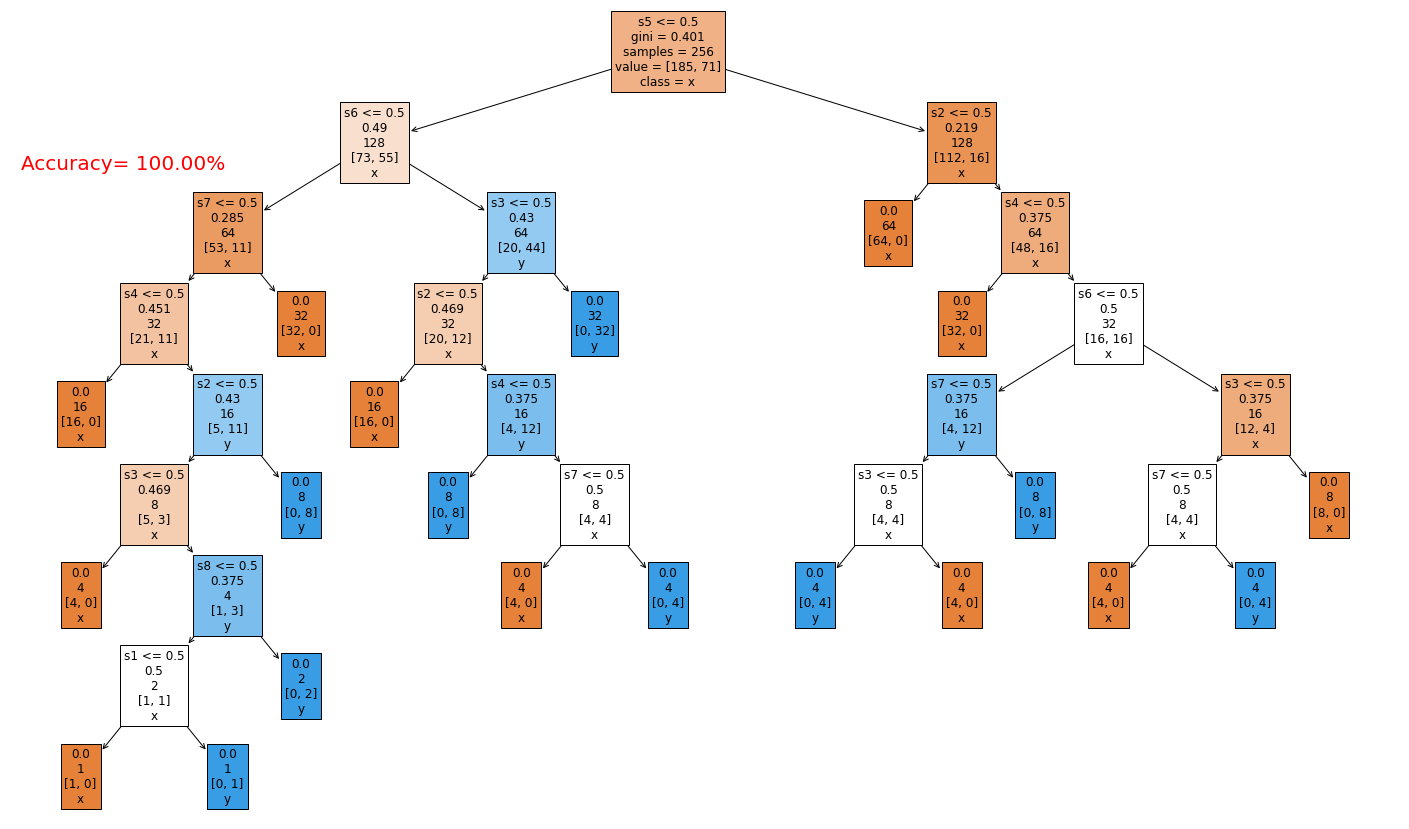

In [168]:


# display p1_df.label column with these colors  x to red, y to blue, ? to gray
# p1_df.style.map(
#     lambda x: f"color: {'red' if x == 'x' else 'blue' if x == 'y' else 'gray'}"
#     , subset=["label"]).map(
#     lambda x: f"background-color: {'yellow' if x == '1' else 'white'}"
#     , subset=["s1", "s2", "s3", "s4", "s5", "s6", "s7", "s8"]
# )

# fit a decison tree model to p1_df 
X = p1_df.iloc[:, 0:8]
Y = p1_df.iloc[:, -1]
# X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=.1, random_state=100)
clf_gini = DecisionTreeClassifier(
    criterion="gini",
    # criterion="entropy",
    random_state = 100, 
    max_depth=8, 
    min_samples_leaf=1,
    # max_leaf_nodes=20,
    )
# clf_gini.fit(X_train, y_train)
clf_gini.fit(X, Y)


# display the decision tree model in high resolution
# tree.plot_tree(clf_gini, filled=True)


# predict the labels of the test set
y_pred = clf_gini.predict(X)
# print("Predicted values:")
# print(y_pred)
# Model Accuracy
# print("Accuracy:", accuracy_score(y_test, y_pred))
# print("Accuracy:", accuracy_score(Y, y_pred))

import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(25, 15))
tree.plot_tree(clf_gini, 
               filled=True, ax=ax, 
               feature_names=X.columns, class_names=["x", "y"], 
               impurity=not False, fontsize=12, label="root", 
               node_ids=not True
)
acc = accuracy_score(Y, y_pred)
ax.annotate(f'Accuracy= {100*acc:.2f}%', xy=(0.01, 0.8), xytext=(0.01, 0.8), fontsize=20, color="red")
plt.show()


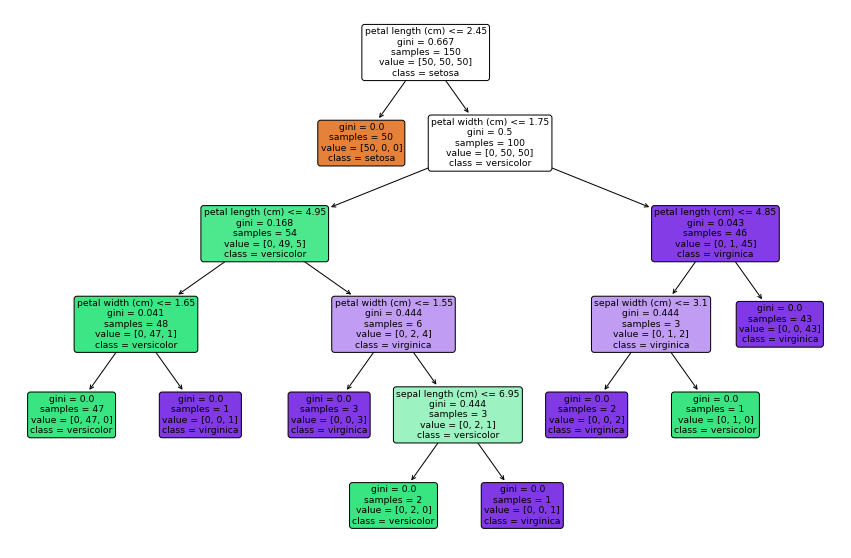

In [92]:
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import matplotlib.pyplot as plt

# Load iris dataset
iris = datasets.load_iris()

# Fit a decision tree
clf = DecisionTreeClassifier(random_state=1234)
model = clf.fit(iris.data, iris.target)

fig = plt.figure(figsize=(15,10))
_ = tree.plot_tree(clf, 
                   feature_names=iris.feature_names,  
                   class_names=iris.target_names,
                   filled=True, rounded=True)
plt.show()

In [179]:
# Fit Rules to p1_df    
from sklearn.tree import _tree
import re
def tree_to_code(tree, feature_names):
    tree_ = tree.tree_
    feature_name = [
        feature_names[i] if i != _tree.TREE_UNDEFINED else "undefined!"
        for i in tree_.feature
    ]
    print("def tree({}):".format(", ".join(feature_names)))

    def recurse(node, depth):
        indent = "  " * depth
        if tree_.feature[node] != _tree.TREE_UNDEFINED:
            name = feature_name[node]
            threshold = tree_.threshold[node]
            # print("{}if {} <= {}:".format(indent, name, threshold))
            print("{}if {} == L:".format(indent, name, threshold))
            recurse(tree_.children_left[node], depth + 1)
            # print("{}else:  # if {} > {}".format(indent, name, threshold))
            print("{}else:  # if {} == G".format(indent, name, threshold))
            recurse(tree_.children_right[node], depth + 1)
        else:
            print("{}return {}".format(indent, tree_.value[node]))

    recurse(0, 1)

# tree_to_code(clf_gini, X.columns)

# Print decision rules
text_representation = tree.export_text(clf_gini)
txt = re.sub(r'0.50', 'L', text_representation)
txt = re.sub(r'feature_', 's', txt)
txt = re.sub(r'<= L', 'is L', txt)
txt = re.sub(r'>  L', 'is G', txt)
txt = re.sub(r'class: 0', '***NOT ALLOWED***', txt)
txt = re.sub(r'class: 1', '{{{ALLOWED}}}', txt)
print(txt)


|--- s4 is L
|   |--- s5 is L
|   |   |--- s6 is L
|   |   |   |--- s3 is L
|   |   |   |   |--- ***NOT ALLOWED***
|   |   |   |--- s3 is G
|   |   |   |   |--- s1 is L
|   |   |   |   |   |--- s2 is L
|   |   |   |   |   |   |--- ***NOT ALLOWED***
|   |   |   |   |   |--- s2 is G
|   |   |   |   |   |   |--- s7 is L
|   |   |   |   |   |   |   |--- s0 is L
|   |   |   |   |   |   |   |   |--- ***NOT ALLOWED***
|   |   |   |   |   |   |   |--- s0 is G
|   |   |   |   |   |   |   |   |--- {{{ALLOWED}}}
|   |   |   |   |   |   |--- s7 is G
|   |   |   |   |   |   |   |--- {{{ALLOWED}}}
|   |   |   |   |--- s1 is G
|   |   |   |   |   |--- {{{ALLOWED}}}
|   |   |--- s6 is G
|   |   |   |--- ***NOT ALLOWED***
|   |--- s5 is G
|   |   |--- s2 is L
|   |   |   |--- s1 is L
|   |   |   |   |--- ***NOT ALLOWED***
|   |   |   |--- s1 is G
|   |   |   |   |--- s3 is L
|   |   |   |   |   |--- {{{ALLOWED}}}
|   |   |   |   |--- s3 is G
|   |   |   |   |   |--- s6 is L
|   |   |   |   |   |   |---

In [169]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# Load data
iris = load_iris()

# Initialize and fit model
clf = DecisionTreeClassifier(random_state=1234)
model = clf.fit(iris.data, iris.target)

# Print decision rules
text_representation = tree.export_text(clf)
print(text_representation)

|--- feature_2 <= 2.45
|   |--- class: 0
|--- feature_2 >  2.45
|   |--- feature_3 <= 1.75
|   |   |--- feature_2 <= 4.95
|   |   |   |--- feature_3 <= 1.65
|   |   |   |   |--- class: 1
|   |   |   |--- feature_3 >  1.65
|   |   |   |   |--- class: 2
|   |   |--- feature_2 >  4.95
|   |   |   |--- feature_3 <= 1.55
|   |   |   |   |--- class: 2
|   |   |   |--- feature_3 >  1.55
|   |   |   |   |--- feature_0 <= 6.95
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- feature_0 >  6.95
|   |   |   |   |   |--- class: 2
|   |--- feature_3 >  1.75
|   |   |--- feature_2 <= 4.85
|   |   |   |--- feature_1 <= 3.10
|   |   |   |   |--- class: 2
|   |   |   |--- feature_1 >  3.10
|   |   |   |   |--- class: 1
|   |   |--- feature_2 >  4.85
|   |   |   |--- class: 2



In [215]:
pada1 = """
LLG L LGG
LLG G LLL
LLG G LGG
LGL L LGG
LGL G LLL
LGL G LGG
LGL G GLL
LGL G GLG
LGL G GGG
LGG L LGG
LGG G LLL
LGG G LGG

GLG L LGG
GLG G LLL
GLG G LGG
GGL L LGG
GGL G LLL
GGL G LGG
GGL G GLL
GGL G GLG
GGL G GGG
GGG L LGG
GGG G LLL
GGG G LGG
"""

pada2 = """
L LGL LGL
L LGG LGL
L GLL LGL
L GGL LGL
L GGG LGL

G LGL LGL
G LGG LGL
G GLL LGL
G GGL LGL
G GGG LGL
"""

pada1_txt = [ x for x in pada1.replace(" ", "").split("\n") if len(x) > 0 ]
pada2_txt = [ x for x in pada2.replace(" ", "").split("\n") if len(x) > 0 ]

pada1_bin = [ x for x in pada1.replace(" ", "").replace("L", "0").replace("G", "1").split("\n") if len(x) > 0 ]
pada2_bin = [ x for x in pada2.replace(" ", "").replace("L", "0").replace("G", "1").split("\n") if len(x) > 0 ]

pada1_df = pd.DataFrame().assign (
    txt = pada1_txt,
    bin = pada1_bin,
    dec = [ int(x, 2)*2 for x in pada1_bin ],
).assign(
    gap = lambda x: x.dec.diff(1).fillna(0).astype(int),
    gap_bin = lambda x: x.gap.apply(lambda x: f"{x:02b}")
)

pada2_df = pd.DataFrame().assign (
    txt = pada2_txt,
    bin = pada2_bin,
    dec = [ int(x, 2)*2 for x in pada2_bin ],
).assign(
    gap = lambda x: x.dec.diff(1).fillna(0).astype(int),
    gap_bin = lambda x: x.gap.apply(lambda x: f"{x:02b}")
)

display( pada1_df , pada2_df )
    



,txt,bin,dec,gap,gap_bin
0,LLGLLGG,0010011,38,0,00
1,LLGGLLL,0011000,48,10,1010
2,LLGGLGG,0011011,54,6,110
3,LGLLLGG,0100011,70,16,10000
4,LGLGLLL,0101000,80,10,1010
5,LGLGLGG,0101011,86,6,110
6,LGLGGLL,0101100,88,2,10
7,LGLGGLG,0101101,90,2,10
8,LGLGGGG,0101111,94,4,100
9,LGGLLGG,0110011,102,8,1000


,txt,bin,dec,gap,gap_bin
0,LLGLLGL,0010010,36,0,00
1,LLGGLGL,0011010,52,16,10000
2,LGLLLGL,0100010,68,16,10000
3,LGGLLGL,0110010,100,32,100000
4,LGGGLGL,0111010,116,16,10000
5,GLGLLGL,1010010,164,48,110000
6,GLGGLGL,1011010,180,16,10000
7,GGLLLGL,1100010,196,16,10000
8,GGGLLGL,1110010,228,32,100000
9,GGGGLGL,1111010,244,16,10000


In [237]:
pd.DataFrame(list(pada1_df.bin.apply(
    lambda x: list(x)
))).style.applymap(
    lambda x: f"color: {'red' if x == '0' else 'blue' if x == '1' else 'gray'}"
)

/var/folders/yw/khs2fgqs5d39_5lgfvh8mqlh0000gn/T/ipykernel_9036/1055854060.py:1: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  pd.DataFrame(list(pada1_df.bin.apply(


,0,1,2,3,4,5,6
0,0,0,1,0,0,1,1
1,0,0,1,1,0,0,0
2,0,0,1,1,0,1,1
3,0,1,0,0,0,1,1
4,0,1,0,1,0,0,0
5,0,1,0,1,0,1,1
6,0,1,0,1,1,0,0
7,0,1,0,1,1,0,1
8,0,1,0,1,1,1,1
9,0,1,1,0,0,1,1
